In [165]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


In [166]:
df = pd.read_csv('water_potability.csv')

In [167]:
df.shape

(3276, 10)

In [168]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [169]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [170]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [171]:
#checking for Missing Values
round(df.isnull().sum()/3276*100)

ph                 15.0
Hardness            0.0
Solids              0.0
Chloramines         0.0
Sulfate            24.0
Conductivity        0.0
Organic_carbon      0.0
Trihalomethanes     5.0
Turbidity           0.0
Potability          0.0
dtype: float64

In [172]:
#Impute missing values with Mean

missingColumns = ['ph','Sulfate','Trihalomethanes']

for column in missingColumns:
    mean = df[column].mean(skipna=True)
    df[column] = df[column].replace(np.NaN,mean)


In [173]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [174]:
#Checking distribution

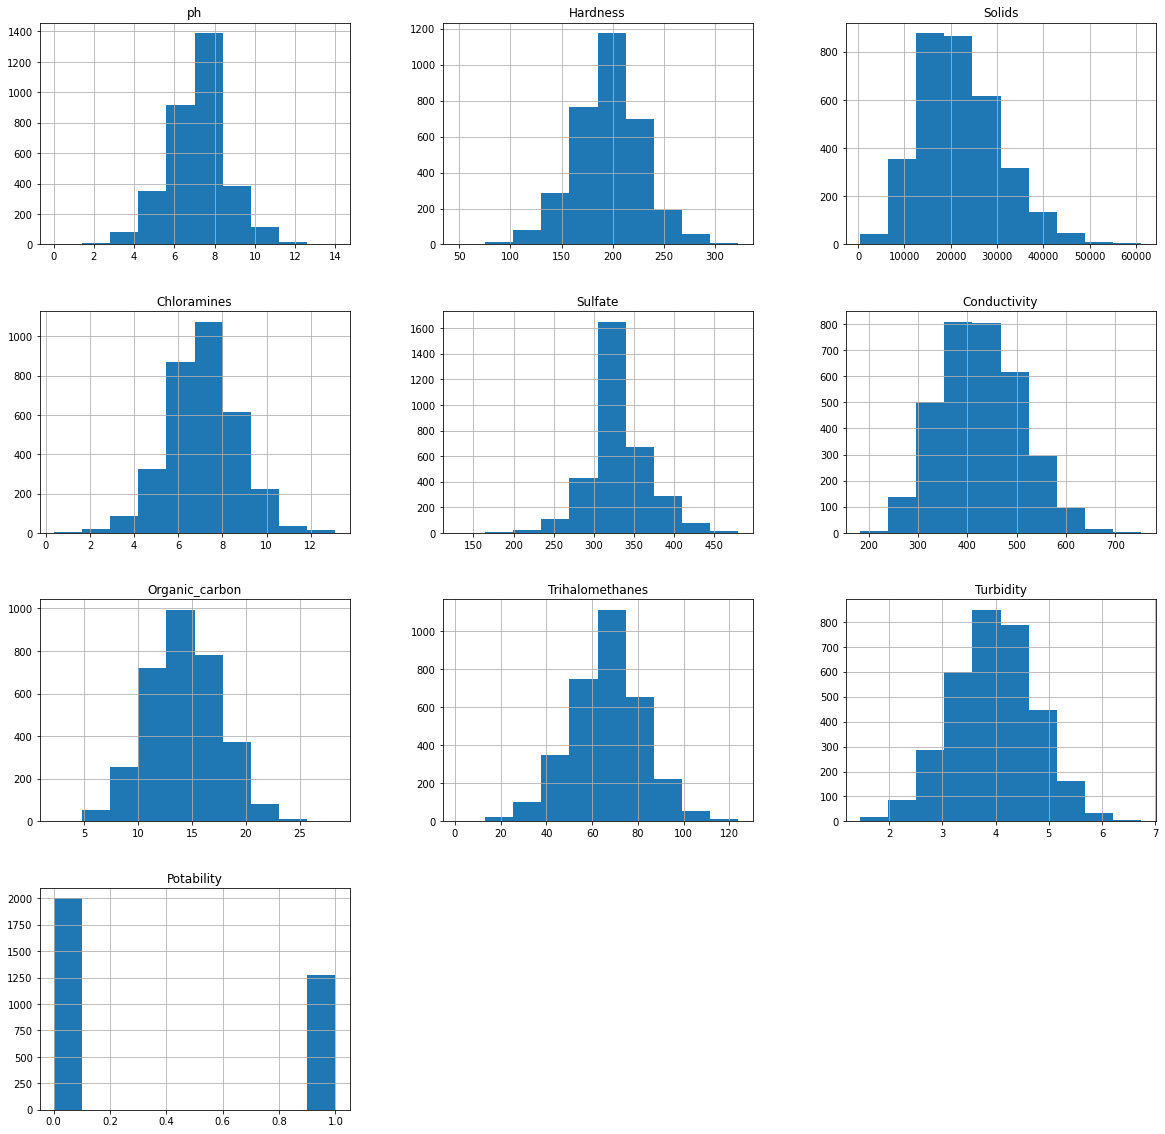

In [175]:
#1. Histogram
df.hist(figsize=(20,20))
plt.title = 'Test'

In [176]:
#Removing Skewness of 'Solids' column
df['Solids'] = np.log(df['Solids'])

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

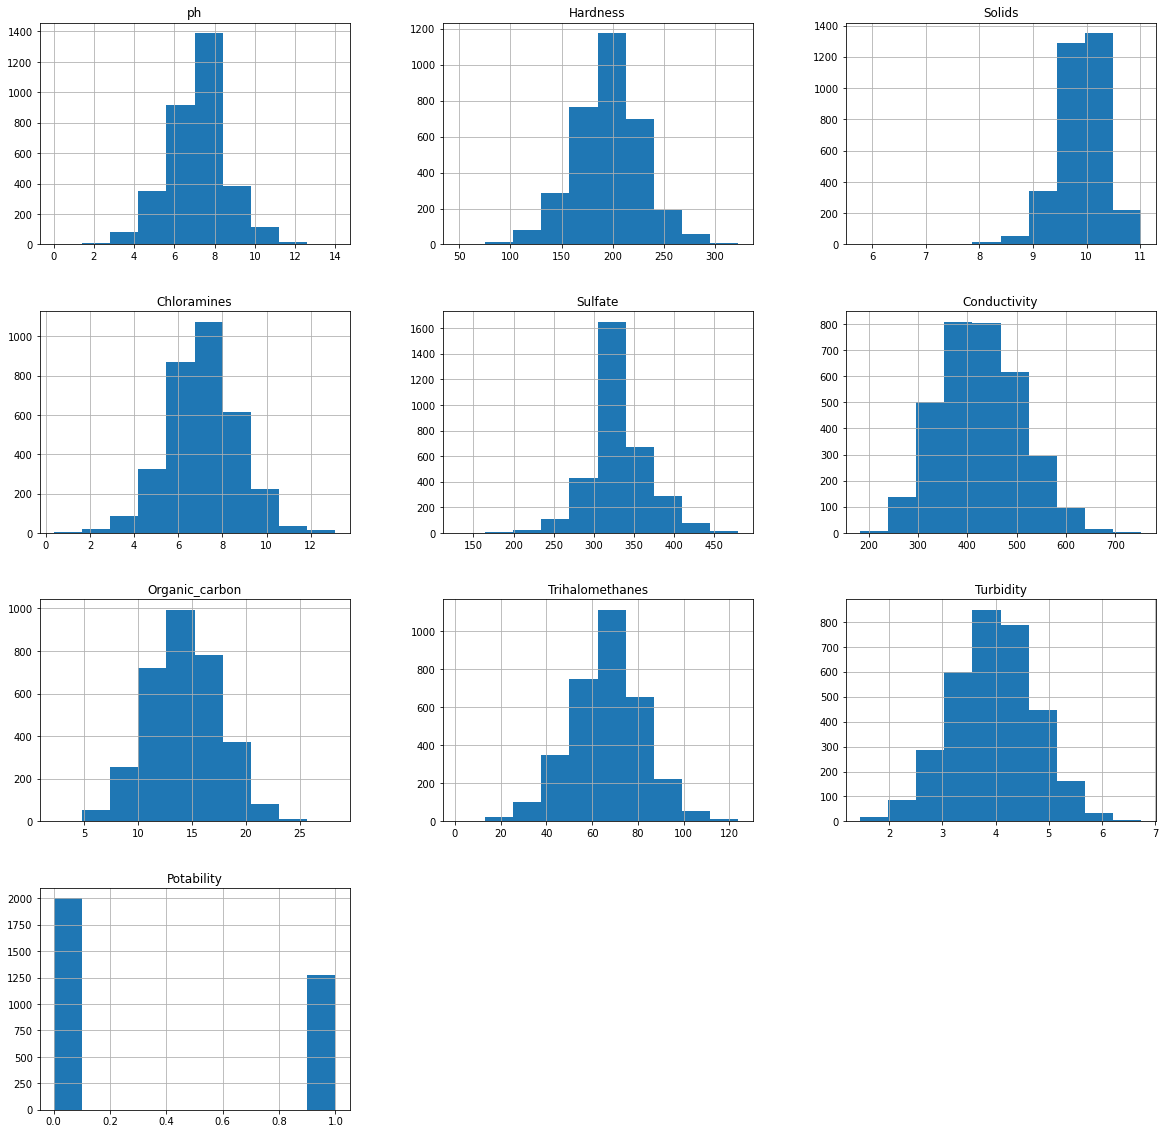

In [177]:
df.hist(figsize=(20,20))

<AxesSubplot:>

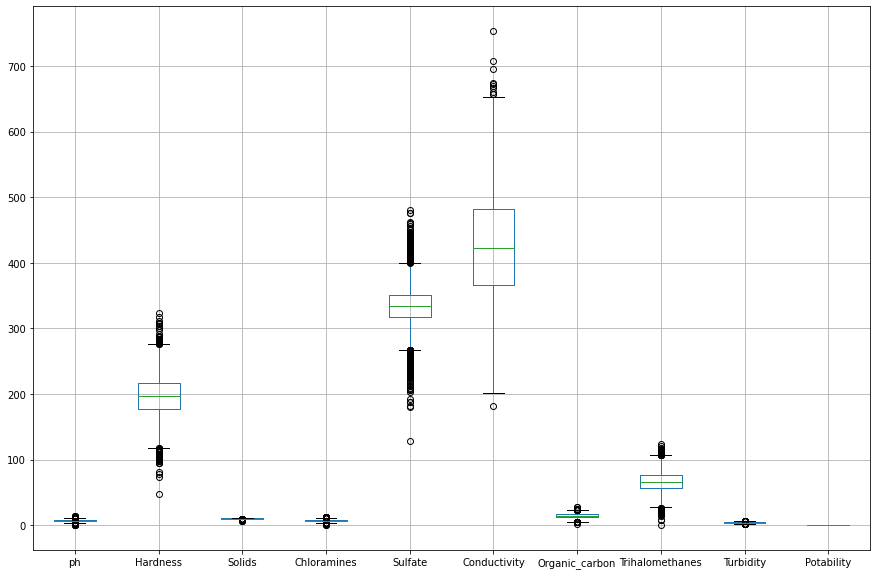

In [178]:
# plt.figure(figsize=(10,4))
# sns.boxplot(data=df,x=df['ph'])
df.boxplot(figsize=(15,10))

In [179]:
#Removing Outliers

In [180]:
for column in df.columns:
    percentile1 = df[column].quantile(0.25)
    percentile3 = df[column].quantile(0.75)
    interqRange = percentile3 - percentile1
    lowerLimit = percentile1 - 1.5*interqRange
    upperLimit = percentile3 + 1.5*interqRange
    df = df[(df[column]>lowerLimit)&(df[column]<upperLimit)]

<AxesSubplot:>

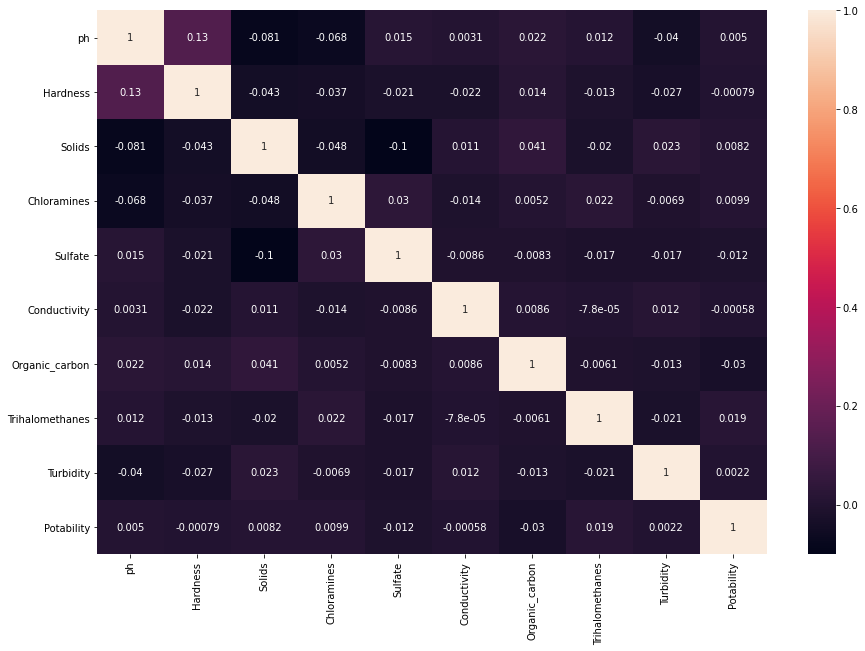

In [181]:
#Correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)


In [182]:
#Splitting Data

X = df.drop('Potability',axis=1)
y = df['Potability']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)


In [183]:
# #Standardize the Data - MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [184]:
#Standardize the Data - Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [185]:
#We will see which algorithm gives the best results for predicting the outcome. 
#Creating a list with the models

models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RFC',RandomForestClassifier()))
models.append(('SVM',SVC(gamma='auto')))

In [186]:
results = []
names = []

for name,model in models:
    kfold = StratifiedKFold(n_splits=10,random_state=7,shuffle=True)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)'%(name,cv_results.mean(),cv_results.std()))

LR: 0.635460 (0.001390)
LDA: 0.635460 (0.001390)
KNN: 0.606642 (0.030388)
CART: 0.551274 (0.031177)
NB: 0.627888 (0.016767)
RFC: 0.643012 (0.027374)
SVM: 0.655334 (0.020833)


In [194]:
meanList =[]
for i in range(0,len(results)):
    print(results[i].mean())
    meanList.append(results[i].mean())
    

0.6354600733255835
0.6354600733255835
0.606641777698292
0.5512742555664849
0.6278883126173656
0.6430117142090673
0.6553339890905839


[0, 1, 2, 3, 4, 5, 6]


<AxesSubplot:>

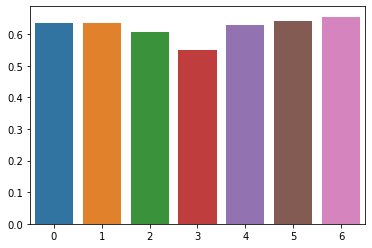

In [213]:
xlist = list(range(0,len(meanList)))
print(x)
sns.barplot(y=meanList,x=xlist)

Dimentionality Reduction(Feature Selection) :

https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/